## Eyad Ahmed AbdelFatah _________Id:20191322456  ____________Group:1B                    
## Khaled Ezzat Saad           _________ Id:20191611924_____________Group:1B

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_path = '/Users/eyadahmed/Downloads/chest_xray/train'
valid_path = '/Users/eyadahmed/Downloads/chest_xray/val'
test_path = '/Users/eyadahmed/Downloads/chest_xray/test'

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['NORMAL', 'PNEUMONIA'], class_mode='binary', batch_size=10)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['NORMAL', 'PNEUMONIA'], class_mode='binary', batch_size=4)

test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['NORMAL', 'PNEUMONIA'], class_mode='binary', batch_size=10)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
imgs, labels = next(train_batches)
x_test, y_test = next(test_batches)
print("imgs matrix shape", imgs.shape)

imgs matrix shape (10, 224, 224, 3)


In [7]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

[1. 0. 1. 1. 0. 1. 0. 0. 0. 1.]


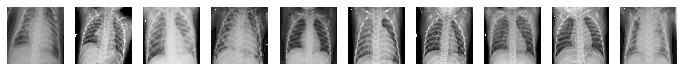

In [8]:
plots(imgs)
print(labels)

In [9]:
model = keras.models.Sequential()              

model.add(Conv2D(16, (3, 3), input_shape=(224,224,3))) 
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))                
convLayer01 = MaxPooling2D(pool_size=(2,2))         
model.add(convLayer01)

model.add(Conv2D(32, (3, 3)))                        
model.add(BatchNormalization(axis=-1)) 
model.add(Activation('relu'))                                     
convLayer02 = MaxPooling2D(pool_size=(2,2))          
model.add(convLayer02)

model.add(Conv2D(32,(3, 3)))                         
model.add(BatchNormalization(axis=-1)) 
model.add(Activation('relu'))                
convLayer03 = MaxPooling2D(pool_size=(2,2))                    
model.add(convLayer03)

model.add(Conv2D(32, (3, 3)))                        
model.add(BatchNormalization(axis=-1)) 
model.add(Activation('relu'))                
convLayer04 = MaxPooling2D(pool_size=(2,2))          
model.add(convLayer04)

model.add(Conv2D(64, (3, 3)))                       
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))                 
convLayer05 = MaxPooling2D(pool_size=(2,2))          
model.add(convLayer05)



model.add(Dropout(0.2)) 
model.add(Flatten())                                

model.add(Dense(512))                                
model.add(BatchNormalization())                      
model.add(Activation('relu'))                        
                      
model.add(Dropout(0.2))                             

model.add(Dense(1))                                  
model.add(Activation('sigmoid'))     

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 222, 222, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0

In [11]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
h = model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2, steps_per_epoch=len(train_batches))

Epoch 1/10
522/522 - 181s - loss: 0.0389 - accuracy: 0.9862 - val_loss: 0.4366 - val_accuracy: 0.8125
Epoch 2/10
522/522 - 206s - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.1404 - val_accuracy: 0.9375
Epoch 3/10
522/522 - 209s - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.4824 - val_accuracy: 0.7500
Epoch 4/10
522/522 - 203s - loss: 0.0375 - accuracy: 0.9902 - val_loss: 0.3222 - val_accuracy: 0.8750
Epoch 5/10
522/522 - 200s - loss: 0.0288 - accuracy: 0.9881 - val_loss: 0.2944 - val_accuracy: 0.8750
Epoch 6/10
522/522 - 200s - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.1545 - val_accuracy: 0.9375
Epoch 7/10
522/522 - 205s - loss: 0.0265 - accuracy: 0.9904 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 8/10
522/522 - 207s - loss: 0.0279 - accuracy: 0.9904 - val_loss: 3.1360 - val_accuracy: 0.6250
Epoch 9/10
522/522 - 201s - loss: 0.0281 - accuracy: 0.9921 - val_loss: 5.4702 - val_accuracy: 0.6250
Epoch 10/10
522/522 - 205s - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.3374 - 

In [14]:
score = model.evaluate(test_batches)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)

63/63 [==============================] - 21s 321ms/step - loss: 1.9703 - accuracy: 0.7308
Test score: 1.9702526330947876
Test accuracy: 73.07692170143127


In [15]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [16]:
predicted_classes = model.predict_classes(x_test)
print(predicted_classes)
print(y_test)

C:\Users\LapStorePlus\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[1. 1. 1. 1. 1. 0. 1. 0. 0. 1.]


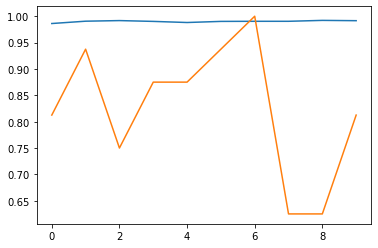

In [19]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])

In [20]:
_, train_acc = model.evaluate(imgs, labels, verbose=0)

In [21]:
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

In [22]:
train_acc

1.0

In [23]:
test_acc

0.699999988079071

In [26]:
from sklearn.metrics import confusion_matrix ,accuracy_score
confusion_matrix(y_test, predicted_classes)



array([[0, 3],
       [0, 7]], dtype=int64)

In [27]:
accuracy_score(y_test, predicted_classes)

0.7

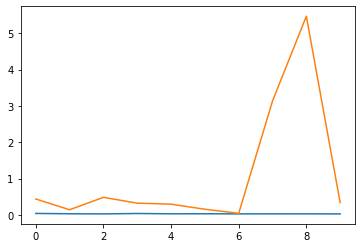

In [29]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

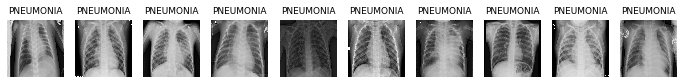

In [30]:
def plots(ims, figsize=(12,6), rows=1, interp=False):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if predicted_classes is not None:
          if (predicted_classes[i] == 1 ):
            sp.set_title("PNEUMONIA", fontsize=9)
          else :
            sp.set_title("NORMAL", fontsize=9)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
plots(x_test)